In [1]:
#importing essential libraries and packages
import pandas as pd
import numpy as np
import nltk
from nltk.tokenize import sent_tokenize  #for tokenizing of words
from sklearn.neural_network import MLPClassifier  
from sklearn.decomposition import SparsePCA   #for applying principal cmponent analysis on a sparse matrix
from sklearn.preprocessing import Normalizer   #normalizing for PCA
from sklearn.pipeline import Pipeline      
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA   #principal component analysis
from nltk.tokenize import word_tokenize 
from sklearn.preprocessing import StandardScaler 
from imblearn.pipeline import make_pipeline as make_pipeline_imb
from imblearn.over_sampling import SMOTE  #to apply amote oversampling filter
from nltk.corpus import stopwords     #stopwords library to deal with stopwords
from sklearn.tree import DecisionTreeClassifier   
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV    #grid search approach to identify best parameters
import string   #for identifying punctuations
import seaborn as sns   
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
import matplotlib.pyplot as plt
%matplotlib inline

C:\Users\kahlo\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
#reading the raw data
data=pd.read_csv('customer review data.csv')

In [3]:
#information about the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2604 entries, 0 to 2603
Data columns (total 19 columns):
Response ID             2604 non-null int64
Name                    1168 non-null object
Email                   2604 non-null object
Score                   2604 non-null int64
Comment                 1510 non-null object
Response Timestamp      2604 non-null object
Notes                   991 non-null object
Tags                    7 non-null object
Account Number          1008 non-null object
Customer                405 non-null object
Customer Number         2 non-null float64
Order Date              35 non-null object
Order Number            13 non-null float64
Order Source            973 non-null object
Route                   659 non-null object
Salesman                988 non-null object
Special Instructions    35 non-null object
User                    951 non-null object
User Name               931 non-null object
dtypes: float64(2), int64(2), object(15)
memory usage: 38

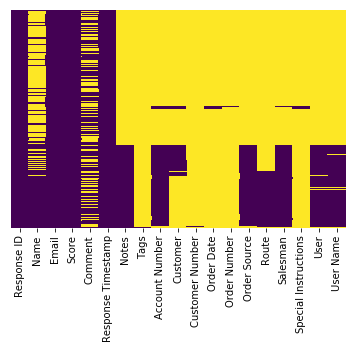

In [4]:
#heatmap to visualize missing data points
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

From the above heatmap, we can see that the data has a lot of missing values but some of the features which have majority missing values won't do any good to our classification tool even if we start imputing values in them. Most of the features are very specific like date stamp of an order, salesperson associated with that order which cannot be imputed by any value.
So we will proceed by dropping those features.

In [5]:
data=data.drop(labels=['Tags','Customer Number','Order Date','Order Number','Special Instructions','Route','Customer','Notes'],axis=1)


In [6]:
data=data.dropna(subset=['Comment'])

'Comment' feature is the one which has the customer feedback text in it. This feature will undergo the test processing followed
by Text classification.

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1510 entries, 1 to 2603
Data columns (total 11 columns):
Response ID           1510 non-null int64
Name                  729 non-null object
Email                 1510 non-null object
Score                 1510 non-null int64
Comment               1510 non-null object
Response Timestamp    1510 non-null object
Account Number        634 non-null object
Order Source          612 non-null object
Salesman              620 non-null object
User                  599 non-null object
User Name             584 non-null object
dtypes: int64(2), object(9)
memory usage: 141.6+ KB


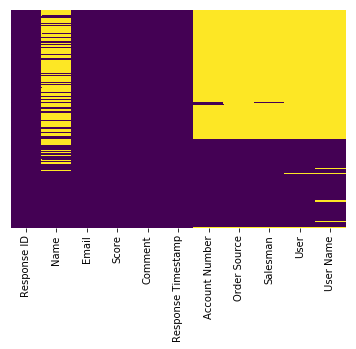

In [8]:
sns.heatmap(data.isnull(),yticklabels=False,cbar=False,cmap='viridis')

This raw data did not have classes assigned to it initially. After manually going through all the customer feedback text in collabaration with the different departments of the company, all the comments were classified into 8 classes covering all the important issues going on in the business process.

In [9]:
#exporting this dataset to impute classes
data.to_csv('final.csv')

In [10]:
#importing data with classes
data1=pd.read_csv('final_data.csv')

In [11]:
#information of features
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1509 entries, 0 to 1508
Data columns (total 13 columns):
Unnamed: 0            1509 non-null int64
Response ID           1509 non-null int64
Name                  729 non-null object
Email                 1509 non-null object
Score                 1509 non-null int64
Comment               1509 non-null object
Class                 1509 non-null object
Response Timestamp    1509 non-null object
Account Number        634 non-null object
Order Source          612 non-null object
Salesman              620 non-null object
User                  599 non-null object
User Name             584 non-null object
dtypes: int64(3), object(10)
memory usage: 153.3+ KB


In [12]:
#removing un named values
data1=data1.drop(labels='Unnamed: 0',axis=1)

In [13]:
data1

,Response ID,Name,Email,Score,Comment,Class,Response Timestamp,Account Number,Order Source,Salesman,User,User Name
0,59755053,SANDERS & PARKS PC,LORI.FOULK@SANDERSPARKS.COM,10,Great Service and my Rep. Steve Rabe is awesom...,great service and prices,6/6/2018 10:28,NaN,NaN,NaN,NaN,NaN
1,59752717,THE ESTANCIA CLUB,LWACASER@ESTANCIACLUB.COM,10,Good selection and prices - quick delivery. A...,great service and prices,6/6/2018 9:53,NaN,NaN,NaN,NaN,NaN
2,59751854,DEER VALLEY UNIFIED SD NO.97,BOBBI.PAUL@DVUSD.ORG,7,"WIST is quick and easy up front, most items ar...",convenient ordering/quick & easy delivery,6/6/2018 9:41,NaN,NaN,NaN,NaN,NaN
3,59751396,NaN,SDELAROCHA@PILLARMAIL.COM,10,We use Wist for all our office supplies! They ...,convenient ordering/quick & easy delivery,6/6/2018 9:35,NaN,NaN,NaN,NaN,NaN
4,59751350,JOKAKE CONSTRUCTION CO INC,LESLIE.BROTHERSON@JOKAKE.COM,10,I would recommend Wist to a friend because of ...,worth of recommendation,6/6/2018 9:34,NaN,NaN,NaN,NaN,NaN
5,59751222,NaN,SHUNT@COURTS.AZ.GOV,10,Great service - always friend and good to work...,great service and prices,6/6/2018 9:32,NaN,NaN,NaN,NaN,NaN
6,59591559,PINAL COUNTY FINANCE,LINDA.TUTTLE@PINALCOUNTYAZ.GOV,10,I can order 10 cases of copy paper or one pen ...,great service and prices,6/4/2018 8:54,NaN,NaN,NaN,NaN,NaN
7,59474132,NaN,maryjane.jones@azbarberboard.us,10,Excellent service!,great service and prices,6/1/2018 16:28,NaN,NaN,NaN,NaN,NaN
8,59468383,NaN,ASHLEY.BERG@ASBCS.AZ.GOV,10,The process has been very simple for staff to ...,worth of recommendation,6/1/2018 14:13,NaN,NaN,NaN,NaN,NaN
9,59467993,NaN,rroberson@portplastics.com,10,"Competitive prices, free shipping and a great ...",great service and prices,6/1/2018 14:06,NaN,NaN,NaN,NaN,NaN


In [14]:
#frequency of each class
data1['Class'].value_counts()

great service and prices                     562
convenient ordering/quick & easy delivery    548
worth of recommendation                      168
website access/graphical issues              103
neutral                                       53
pricing issues                                38
delivery issues                               27
availability issues                           10
Name: Class, dtype: int64

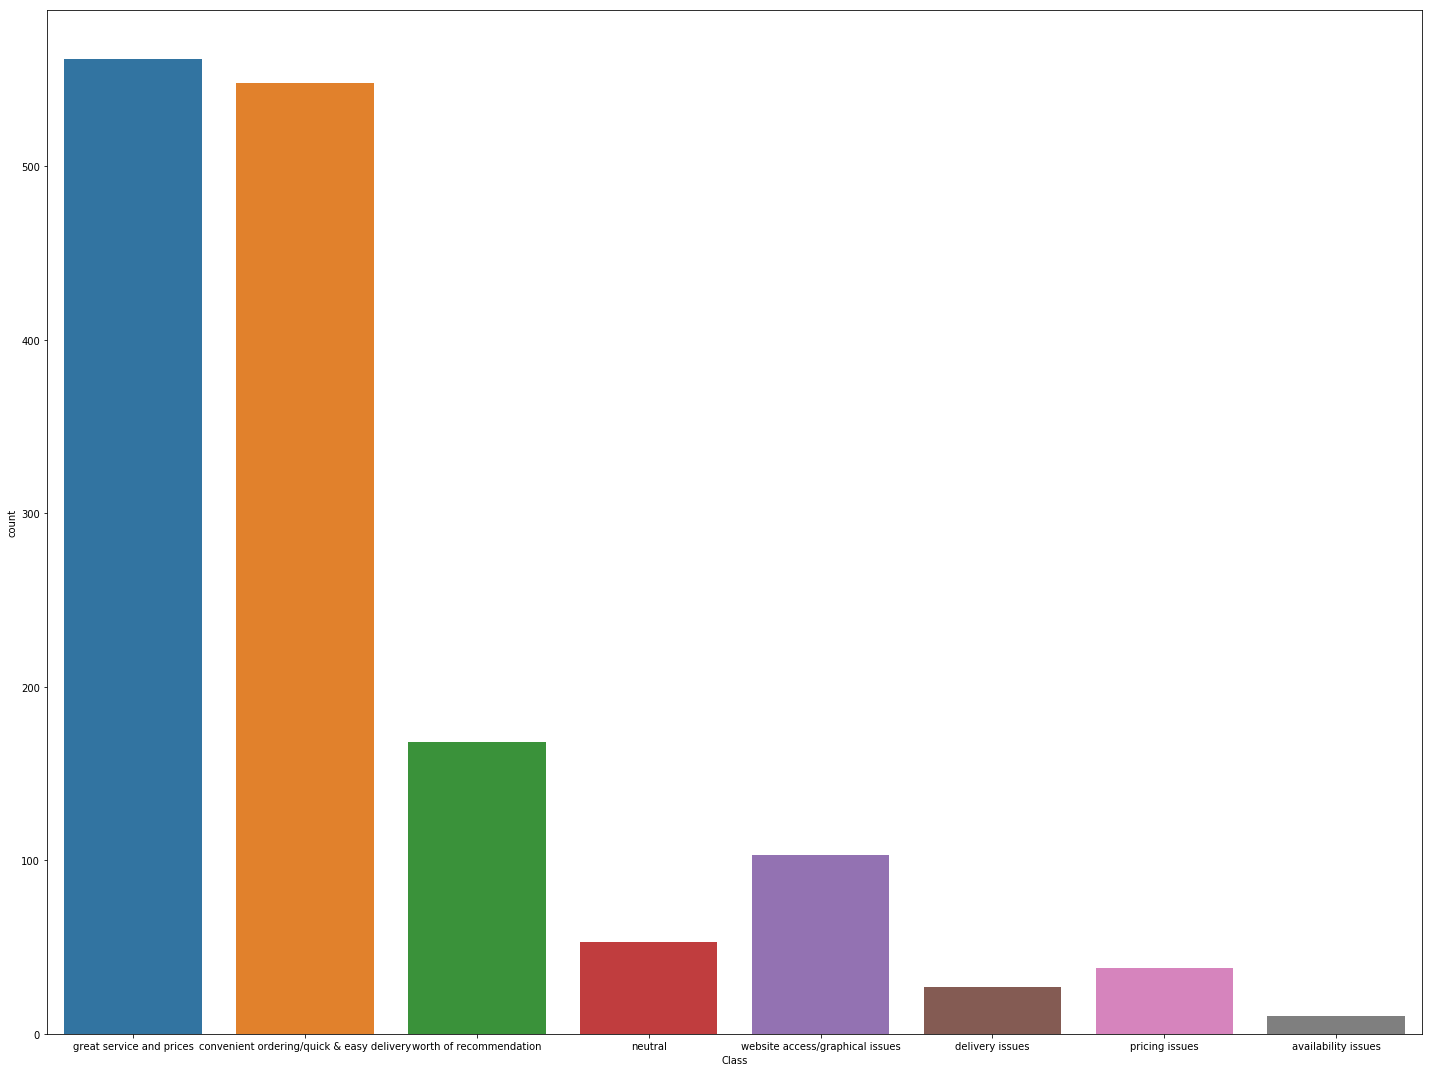

In [15]:
#visualizing count of each class to check class imbalance
plt.figure(figsize=(20,15))
xticks=['great service and prices','convenient ordering/quick and easy delivery','worth of recommendation','neutral','website access/graphical issues','delivery issues','pricing issues','availability issues']
sns.countplot(x='Class',data=data1)
plt.tight_layout()

In [16]:
#importing classifiers and oversampling packages
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier



In [17]:
#importing text processing packages
from nltk.stem import WordNetLemmatizer
w1=WordNetLemmatizer()
from nltk.tag import pos_tag


In [18]:
#text process function to process punctuation, stopwords and lemmatization
def textprocess(text):
    punc_free=[char for char in text if char not in string.punctuation]
    join=''.join(punc_free)
    stop_free=[word for word in join.split() if word.lower() not in stopwords.words('english')]
    lemma_words= [w1.lemmatize(w) for w in stop_free]
    return lemma_words
    


In [19]:
#importing count vectorizer to convert text into a vector form
#importing  term frequency–inverse document frequency package
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
    

In [20]:
#fitting count vectorizer with our text process defined function
bow_transformer=CountVectorizer(analyzer=textprocess).fit(data1['Comment'])

In [21]:
#transformation to vector form
bow_comment=bow_transformer.transform(data1['Comment'])

In [22]:
#using smote for over sampling to tackle class imbalance
X_smote, y_smote = SMOTE(random_state=50,k_neighbors=5).fit_sample(bow_comment, data1['Class'])

In [23]:
#normalizing the vector obtained
normal=Normalizer()
normal.fit(X_smote)

Normalizer(copy=True, norm='l2')

In [24]:
x_normal=normal.transform(X_smote)

In [25]:
x_normal=x_normal.toarray()

we are applying principal component analysis on this vector since there are too manu dimensions so PCA will help in dimensionality reduction
Sparse PCA has been used in this as the vector contains too many zeros due to each word not being present in every comment.

In [26]:
#reducing the features to 650 as they explain the maximum of variance
pca=SparsePCA(n_components=650)
pca.fit(x_normal)

SparsePCA(U_init=None, V_init=None, alpha=1, max_iter=1000, method='lars',
     n_components=650, n_jobs=1, random_state=None, ridge_alpha=0.01,
     tol=1e-08, verbose=False)

In [27]:
x_pca=pca.transform(x_normal)

In [28]:
#splitting the datset in to training and test data
Xtrain, Xtest, ytrain, ytest = train_test_split(x_pca, y_smote, test_size=0.33, random_state=42)

In [29]:
#defining param dictionary for grid search
param={"max_features": ['auto','log2'],
              "n_estimators":[100,200,300],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

In [30]:
#defining grid search CV
grid=GridSearchCV(RandomForestClassifier(),param_grid=param,cv=2)

In [31]:
#defining a pipeline of tfidf and the classifier
pip_grid = Pipeline([
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', grid)])

In [32]:
#cross validation score for 10 folds
scores=cross_val_score(pip_grid,Xtrain,ytrain,cv=10)
scores.mean()

0.8987033468735863

In [33]:
#fitting the pipeline
pip_grid.fit(Xtrain,ytrain)

Pipeline(memory=None,
     steps=[('tfidf', TfidfTransformer(norm='l2', smooth_idf=True, sublinear_tf=False, use_idf=True)), ('classifier', GridSearchCV(cv=2, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_l...   pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0))])

In [34]:
#predictions
prediction=pip_grid.predict(Xtest)

In [35]:
#printing the metrics
print(metrics.classification_report(ytest,prediction))
print(metrics.confusion_matrix(ytest,prediction))

                                           precision    recall  f1-score   support

                      availability issues       1.00      1.00      1.00       175
convenient ordering/quick & easy delivery       0.74      0.64      0.68       203
                          delivery issues       0.99      0.99      0.99       171
                 great service and prices       0.69      0.71      0.70       185
                                  neutral       0.92      1.00      0.96       177
                           pricing issues       0.97      0.99      0.98       194
          website access/graphical issues       0.93      0.97      0.95       187
                  worth of recommendation       0.92      0.91      0.91       192

                              avg / total       0.89      0.90      0.89      1484

[[175   0   0   0   0   0   0   0]
 [  0 129   1  47   6   2  12   6]
 [  0   0 170   0   0   0   1   0]
 [  0  36   0 131   6   3   0   9]
 [  0   0   0   0 177   0  

predicting some observations